In [205]:
import numpy as np
import hiive.mdptoolbox
import matplotlib.pyplot as plt
from hiive.mdptoolbox import mdp, example
from gym.envs.toy_text.frozen_lake import generate_random_map

random_map_l=generate_random_map(size = 50, p=0.8)
#random_map_l = ['SFHHFFFFFFFFHFFHFFFH', 'FFFFFFFHFFHFFFHFFFFF', 'FFFFFFFHFFFHFHHFFFFF', 'FFFFFFFFHFFFFFFFFHFH', 'FFHFFFFHFHFFFFFHFHFF', 'HHFFFFFFHFHFFFFFFFFF', 'HFFFFHHFFFFFFFFHFHFF', 'FFFHFHFFFFHFFHFHFFFF', 'FFHFHFFFFFFHFFFFFHHF', 'FFFFFFFFHFFFFFFFFFFF', 'FFFFFFHHHFFFFFHFFHFH', 'FFFHFFHHFFFFFHFFHFHF', 'FFFFHFFFFFFFFFHFFFFH', 'FFFFFFFHFFHFHFFFFFFF', 'FFFFFFHFFHFHFFFFFFHF', 'HFFFFFFFHFFFFFHFFHFF', 'FFFFFHHFFFFFFHFFFHFF', 'FFFHHFFFFFHFFFFFFHHF', 'FFFFFFHFFHFFFFFFFFFF', 'FFFFHFFFHFHFFHFFFFFG']

P_FL_l, R_FL_l = hiive.mdptoolbox.example.openai('FrozenLake-v1', desc=random_map_l, map_name="30x30", is_slippery=True)

In [244]:
vi_l = mdp.ValueIteration(P_FL_l, R_FL_l, gamma = 0.9999999999, epsilon = 0.0000000000001)
vi_l.run()
print('The optimal policy function:', vi_s.policy)
print('The number of iterations taken to complete the computation. :',vi_s.iter)
print('The amount of CPU time used to run the algorithm :',vi_s.time)

The optimal policy function: (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0)
The number of iterations taken to complete the computation. : 9
The amount of CPU time used to run the algorithm : 0.0017910003662109375


['SHFFFFFFFFFFFFFFFHFHHHFFFFFFFFFHFHFFFFHFHFFFHHFFFF', 'FFFFFFFFFFFFFFFFFFFFFFFFFFHFFFHFFFFFFFFFFFHFFFFFFF', 'FHHFFFFFFFFFHFFFHHFFFHFFFFHFFFHFFFFHHFFFFFFFHFFFFF', 'FFFFFFFFFFFFHFFHFFFHFFFHFHFFFHFFFFFFFFFHHFFFFFFFFF', 'FHFFFHFFHFFFHFFFFHFFFHFFFHHFFFFFHFFFFFFHFHFFFHHFFF', 'FFHFFFFFFFFFHFFFFFFFFHFFFFFHFFFFFHFFFFHFFFFFFFFFHF', 'HFFFHFFFHFHFFFFFFFFFFFFFFFFFFFFFHFFFFFFHFFFFFFHFFF', 'FFFFFFFFHFFHHFHHFFFFFHFFFFFFFFFFFFHHFFHFFFFFFHHFFH', 'FFHFFHFFFHFHFHFFFHFHFFFFHFFFHFFFFFFFFHHHFFFFFFFFFF', 'FFHFFFFFFFHFFFFFHFFFFHFHFFFFFFFFFFFFFFFFFFFFFFFHFF', 'HHFFFHFFFHFFFHFFFFHFHFFFHFFFFHFFFHFFHFHFFFFFFHFFFF', 'FFFFHFFHFFFHFHFFHFFHHHHHFFFFFFFFFFFFFFFFFFFFFHFHFF', 'FFHFFFFFFFFFHFFHFFFFFFFFHHFFFHFFFFFFFHFFFHFFFFFFFF', 'FFFFFFFFFFFFFFHFFFFFFFHFFFFFFHHFHHFHHFFFHFHHFFFFHF', 'HFFFFFFFFFHFFFFFFFFFFFFFHFFFFFFHHFFHHFFFFFFFFFFHFH', 'HFFFFHFFFFFHHFFFFHFFFFFFFFFFFFHFFFFHFFFFFFFHHFFFHF', 'FFFFFFFHFFHFFFFFFFFFFFFFFHFFHFHFFFFFFFFFFFFFHFFHFF', 'FFFFFFFFFFFFHFFFFHHFFHHFFHFFFFHHFFFFFFHFFFFFFFFFFF', 'FFFFFFFHHHFFFFFFHHHHFFFFFF

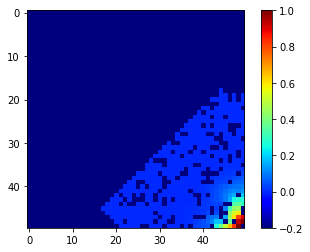

In [232]:
size = 50
list_X, list_Y = np.meshgrid(np.linspace(0, size-1, size), np.linspace(0, size-1, size))
value_l = list(vi_l.V)
list_Z = []
for i in range(len(value_l)):
    list_Z.append(value_l[i]/max(value_l))
    if list_Z[i]==0:
        list_Z[i]= -0.2
        
list_Z_norm = np.reshape(list_Z,(size,size))

print(random_map_l)
print(np.reshape(vi_l.V,(size,size)))

# plot
fig, ax = plt.subplots()

pos = ax.imshow(list_Z_norm,interpolation='none',cmap=plt.cm.jet)
fig.colorbar(pos, ax=ax)
plt.show()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 3 1 1]
 [0 0 0 ... 0 2 1]
 [0 0 0 ... 1 2 0]]


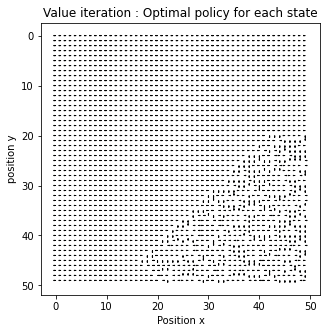

In [233]:
arrows = {0:(-1,0), 3:(0,-1), 2:(1,0), 1:(0,1)}
scale = 0.25

ar_l =  np.reshape(vi_l.policy,(size,size))
print(ar_l)
fig, ax = plt.subplots(figsize=(5, 5))
w = ax.invert_yaxis()
ax.set_title('Value iteration : Optimal policy for each state')
ax.set_xlabel('Position x')
ax.set_ylabel('position y')
for r, row in enumerate(ar_l):
    for c, cell in enumerate(row):
        plot1 = plt.arrow(c, r, scale*arrows[cell][0], scale*arrows[cell][1], head_width=0.1)

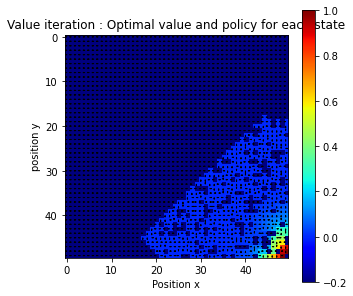

In [234]:
arrows = {0:(-1,0), 3:(0,-1), 2:(1,0), 1:(0,1)}
scale = 0.25

fig, ax = plt.subplots(figsize=(5, 5))
w = ax.invert_yaxis()
ax.set_title('Value iteration : Optimal value and policy for each state')
ax.set_xlabel('Position x')
ax.set_ylabel('position y')
for r, row in enumerate(ar_l):
    for c, cell in enumerate(row):
        if c != size-1 or r != size-1 :
            plot = plt.arrow(c, r, scale*arrows[cell][0], scale*arrows[cell][1], head_width=0.1)
plot = ax.imshow(list_Z_norm,interpolation='none',cmap=plt.cm.jet)
fig.colorbar(pos, ax=ax)
plt.show()

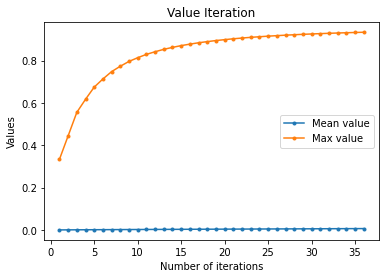

In [235]:
list_meanV_VI_l = []
list_maxV_VI_l = []
list_iteration_VI_l = []
for i in range(len(vi_l.run_stats)):
    list_meanV_VI_l.append(vi_l.run_stats[i].get('Mean V'))
    list_maxV_VI_l.append(vi_l.run_stats[i].get('Max V'))
    list_iteration_VI_l.append(vi_l.run_stats[i].get('Iteration'))

fig, ax = plt.subplots()
ax.set_title('Value Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Values')
ax.plot(list_iteration_VI_l, list_meanV_VI_l, marker ='.', label="Mean value")
ax.plot(list_iteration_VI_l, list_maxV_VI_l, marker=".", label="Max value")
ax.legend()
plt.show()

In [236]:
pi_l = mdp.PolicyIteration(P_FL_l, R_FL_l, 0.9, max_iter = 4)
pi_l.run()
print('The number of iterations taken to complete the computation. :',pi_l.iter)
print('The amount of CPU time used to run the algorithm :',pi_l.time)

The number of iterations taken to complete the computation. : 4
The amount of CPU time used to run the algorithm : 1.4697191715240479


Random map
['SHFFFFFFFFFFFFFFFHFHHHFFFFFFFFFHFHFFFFHFHFFFHHFFFF', 'FFFFFFFFFFFFFFFFFFFFFFFFFFHFFFHFFFFFFFFFFFHFFFFFFF', 'FHHFFFFFFFFFHFFFHHFFFHFFFFHFFFHFFFFHHFFFFFFFHFFFFF', 'FFFFFFFFFFFFHFFHFFFHFFFHFHFFFHFFFFFFFFFHHFFFFFFFFF', 'FHFFFHFFHFFFHFFFFHFFFHFFFHHFFFFFHFFFFFFHFHFFFHHFFF', 'FFHFFFFFFFFFHFFFFFFFFHFFFFFHFFFFFHFFFFHFFFFFFFFFHF', 'HFFFHFFFHFHFFFFFFFFFFFFFFFFFFFFFHFFFFFFHFFFFFFHFFF', 'FFFFFFFFHFFHHFHHFFFFFHFFFFFFFFFFFFHHFFHFFFFFFHHFFH', 'FFHFFHFFFHFHFHFFFHFHFFFFHFFFHFFFFFFFFHHHFFFFFFFFFF', 'FFHFFFFFFFHFFFFFHFFFFHFHFFFFFFFFFFFFFFFFFFFFFFFHFF', 'HHFFFHFFFHFFFHFFFFHFHFFFHFFFFHFFFHFFHFHFFFFFFHFFFF', 'FFFFHFFHFFFHFHFFHFFHHHHHFFFFFFFFFFFFFFFFFFFFFHFHFF', 'FFHFFFFFFFFFHFFHFFFFFFFFHHFFFHFFFFFFFHFFFHFFFFFFFF', 'FFFFFFFFFFFFFFHFFFFFFFHFFFFFFHHFHHFHHFFFHFHHFFFFHF', 'HFFFFFFFFFHFFFFFFFFFFFFFHFFFFFFHHFFHHFFFFFFFFFFHFH', 'HFFFFHFFFFFHHFFFFHFFFFFFFFFFFFHFFFFHFFFFFFFHHFFFHF', 'FFFFFFFHFFHFFFFFFFFFFFFFFHFFHFHFFFFFFFFFFFFFHFFHFF', 'FFFFFFFFFFFFHFFFFHHFFHHFFHFFFFHHFFFFFFHFFFFFFFFFFF', 'FFFFFFFHHHFFFFF

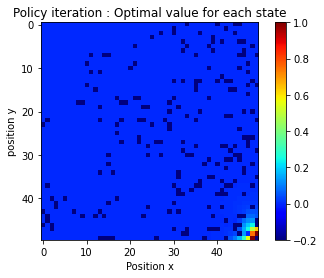

In [237]:
list_X, list_Y = np.meshgrid(np.linspace(0, size-1, size), np.linspace(0, size-1, size))
policy_l = list(pi_l.V)
list_Z = []
for i in range(len(policy_l)):
    list_Z.append(policy_l[i]/max(policy_l))
    if list_Z[i]==0:
        list_Z[i]= -0.2
        
list_Z_norm = np.reshape(list_Z,(size,size))

print('Random map')
print(random_map_l)

print('Optimal value function :')
print(np.reshape(pi_l.V,(size,size)))

# plot
fig, ax = plt.subplots()
ax.set_title('Policy iteration : Optimal value for each state')
ax.set_xlabel('Position x')
ax.set_ylabel('position y')
pos = ax.imshow(list_Z_norm,interpolation='none',cmap=plt.cm.jet)
fig.colorbar(pos, ax=ax)
plt.show()

Optimal policy :
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [1 1 0 ... 3 1 1]
 [1 2 0 ... 0 2 1]
 [2 2 0 ... 1 2 0]]


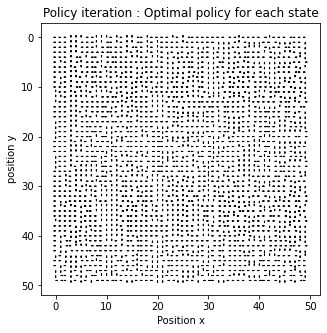

In [238]:
arrows = {0:(-1,0), 3:(0,-1), 2:(1,0), 1:(0,1)}
scale = 0.25

ar_l =  np.reshape(pi_l.policy,(size,size))
print('Optimal policy :')
print(ar_l)

fig, ax = plt.subplots(figsize=(5, 5))
w = ax.invert_yaxis()
ax.set_title('Policy iteration : Optimal policy for each state')
ax.set_xlabel('Position x')
ax.set_ylabel('position y')
for r, row in enumerate(ar_l):
    for c, cell in enumerate(row):
        plot1 = plt.arrow(c, r, scale*arrows[cell][0], scale*arrows[cell][1], head_width=0.1)

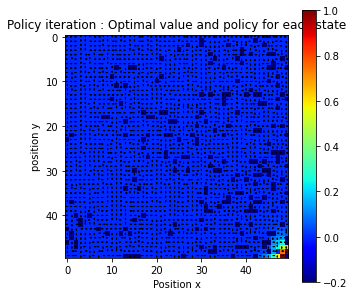

In [239]:
arrows = {0:(-1,0), 3:(0,-1), 2:(1,0), 1:(0,1)}
scale = 0.25

fig, ax = plt.subplots(figsize=(5, 5))
w = ax.invert_yaxis()
ax.set_title('Policy iteration : Optimal value and policy for each state')
ax.set_xlabel('Position x')
ax.set_ylabel('position y')
for r, row in enumerate(ar_l):
    for c, cell in enumerate(row):
        if c != size-1 or r != size-1 :
            plot = plt.arrow(c, r, scale*arrows[cell][0], scale*arrows[cell][1], head_width=0.1)
plot = ax.imshow(list_Z_norm,interpolation='none',cmap=plt.cm.jet)
fig.colorbar(pos, ax=ax)
plt.show()

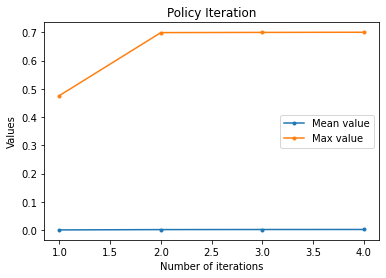

In [240]:
list_meanV_PI_l = []
list_maxV_PI_l = []
list_iteration_PI_l = []
for i in range(len(pi_l.run_stats)):
    list_meanV_PI_l.append(pi_l.run_stats[i].get('Mean V'))
    list_maxV_PI_l.append(pi_l.run_stats[i].get('Max V'))
    list_iteration_PI_l.append(pi_l.run_stats[i].get('Iteration'))

fig, ax = plt.subplots()
ax.set_title('Policy Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Values')
ax.plot(list_iteration_PI_l, list_meanV_PI_l, marker ='.', label="Mean value")
ax.plot(list_iteration_PI_l, list_maxV_PI_l, marker=".", label="Max value")
ax.legend()
plt.show()

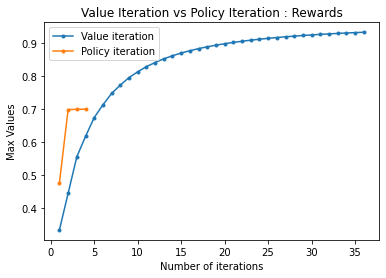

In [241]:
# Value iteration vs policy iteration : Max value
list_maxV_VI_l = []
list_maxV_PI_l = []
list_iteration_VI_l = []
list_iteration_PI_l = []
for i in range(len(pi_l.run_stats)):
    list_maxV_PI_l.append(pi_l.run_stats[i].get('Max V'))
    list_iteration_PI_l.append(pi_l.run_stats[i].get('Iteration'))

for i in range(len(vi_l.run_stats)):
    list_maxV_VI_l.append(vi_l.run_stats[i].get('Max V'))
    list_iteration_VI_l.append(vi_l.run_stats[i].get('Iteration'))
    
fig, ax = plt.subplots()
ax.set_title('Value Iteration vs Policy Iteration : Rewards')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Max Values')
ax.plot(list_iteration_VI_l, list_maxV_VI_l, marker ='.', label="Value iteration")
ax.plot(list_iteration_PI_l, list_maxV_PI_l, marker=".", label="Policy iteration")
ax.legend()
plt.show()

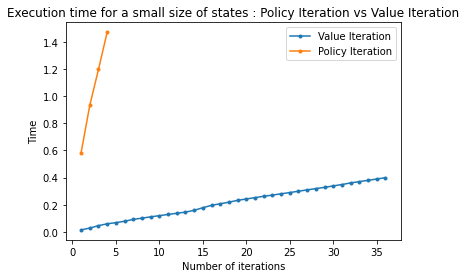

In [242]:
list_time_VI_l = []
list_time_PI_l = []
list_iteration_PI_l = []
list_iteration_VI_l = []
for i in range(len(vi_l.run_stats)):
    list_time_VI_l.append(vi_l.run_stats[i].get('Time'))
    list_iteration_VI_l.append(vi_l.run_stats[i].get('Iteration'))
    
for i in range(len(pi_l.run_stats)):
    list_iteration_PI_l.append(pi_l.run_stats[i].get('Iteration'))
    list_time_PI_l.append(pi_l.run_stats[i].get('Time'))

fig, ax = plt.subplots()
ax.set_title('Execution time for a small size of states : Policy Iteration vs Value Iteration')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Time')
ax.plot(list_iteration_VI_l, list_time_VI_l, marker ='.', label="Value Iteration")
ax.plot(list_iteration_PI_l, list_time_PI_l, marker=".", label="Policy Iteration")
ax.legend()
plt.show()